In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report
import os

In [2]:
os.chdir("D:/Data Science/Assignments/KNN")
Zoo=pd.read_csv("Zoo.csv")
Zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [3]:
Zoo.describe(include="all")

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
unique,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,frog,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,NaN,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,NaN,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,NaN,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000


In [4]:
Zoo.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [5]:
Zoo['type'].value_counts()

type
1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: count, dtype: int64

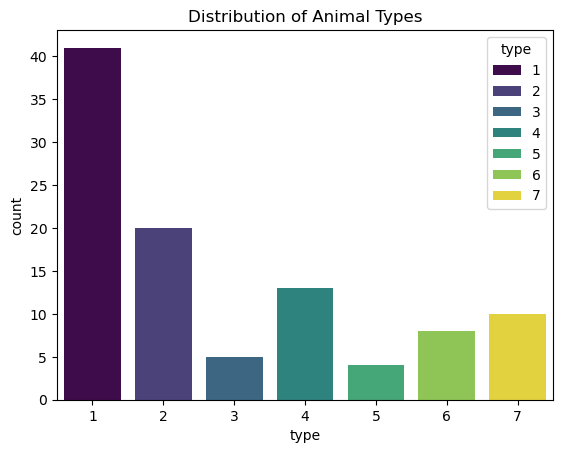

In [8]:
sns.countplot(x='type', data=Zoo, hue='type',palette='viridis')
plt.title('Distribution of Animal Types')
plt.show()

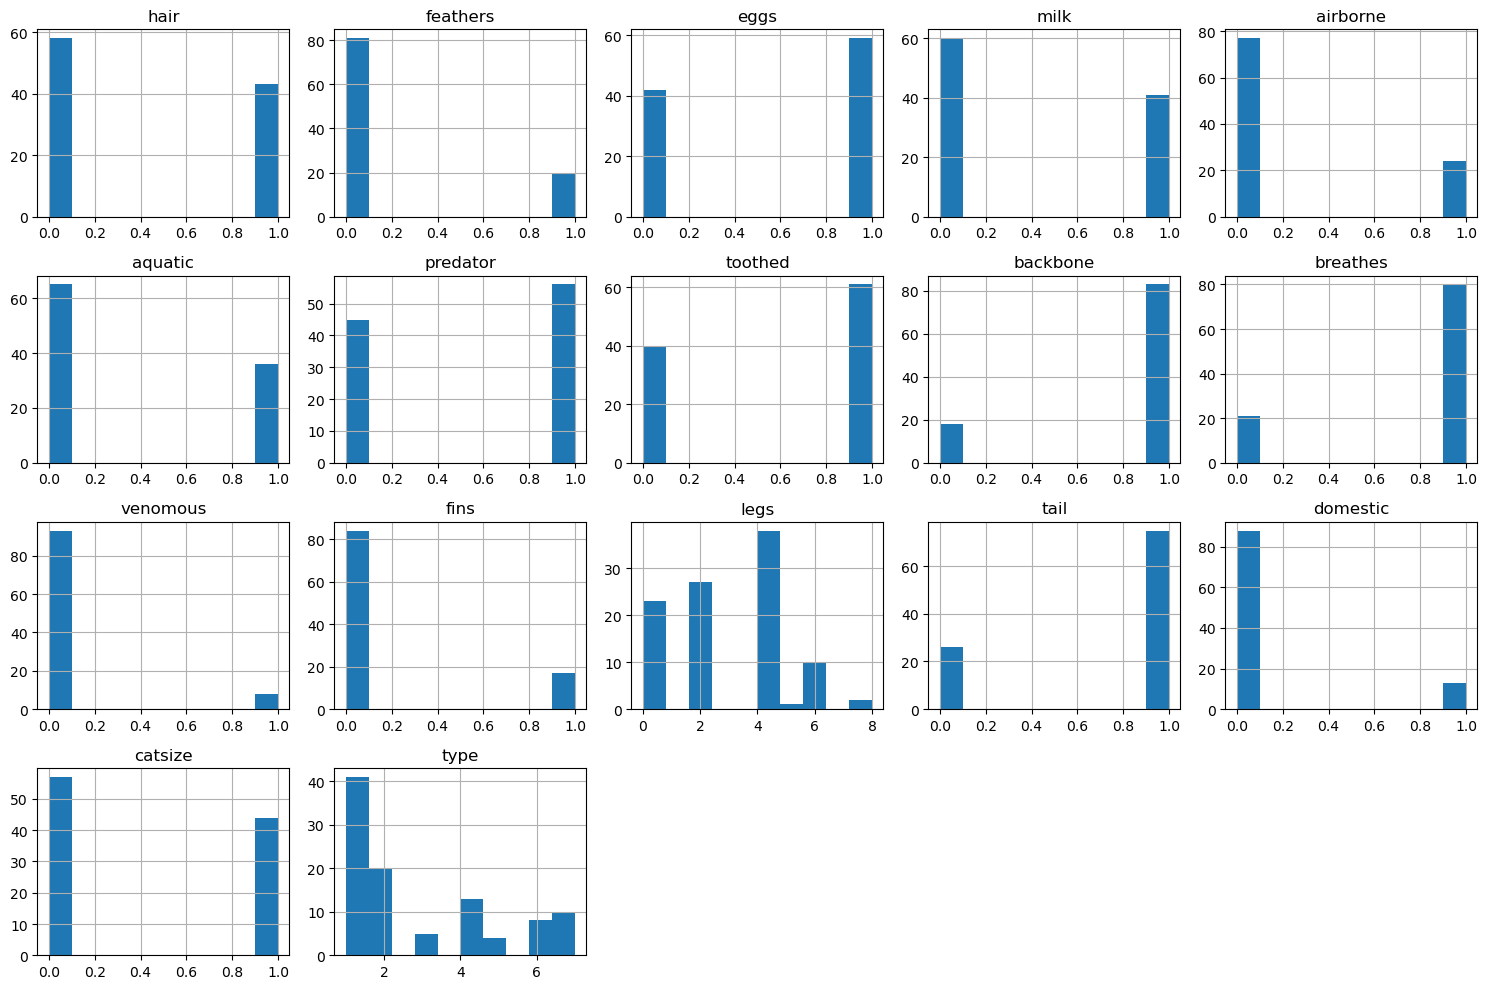

In [6]:
Zoo.hist(layout=(4,5),figsize=(15,10))
plt.tight_layout()
plt.show()

<Axes: >

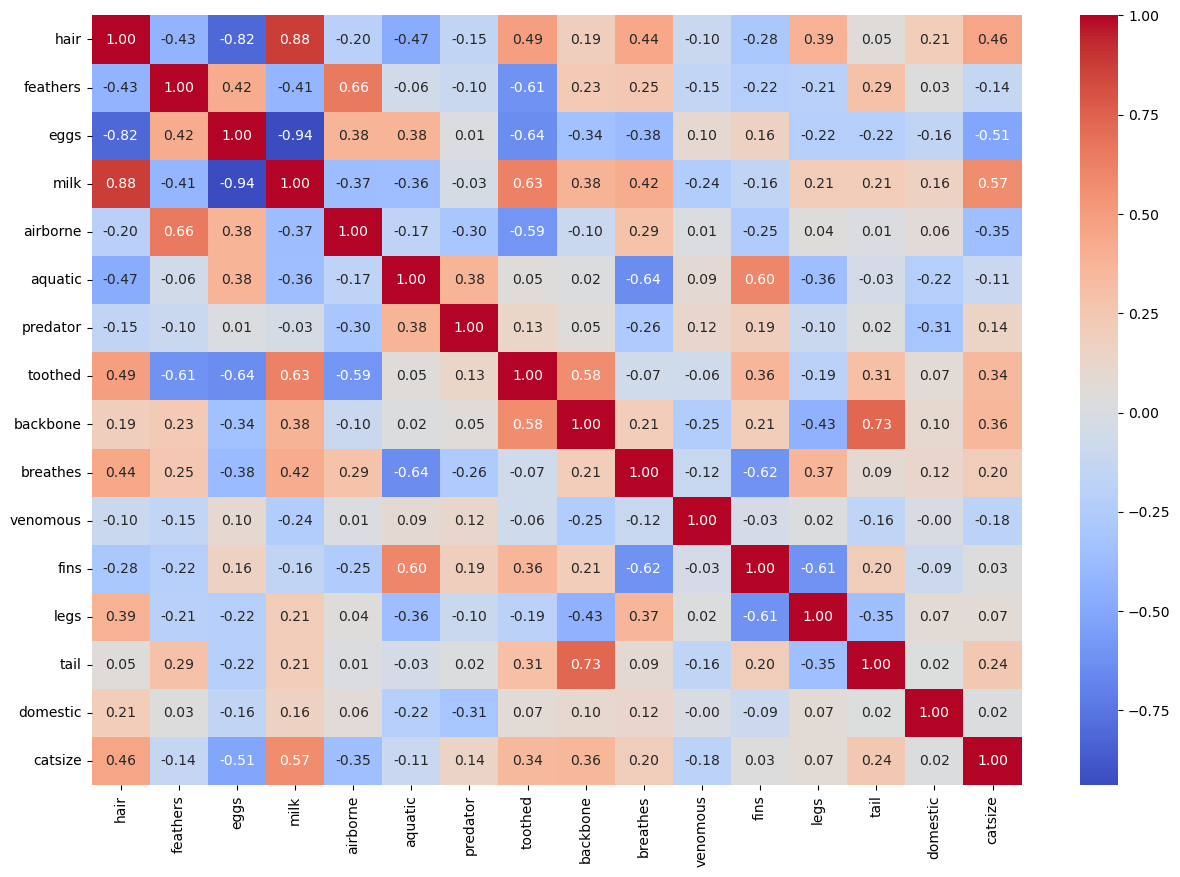

In [7]:
plt.figure(figsize=(15,10))
sns.heatmap(Zoo.iloc[:,:17].corr(numeric_only=True),annot=True,fmt='.2f',cmap='coolwarm')


In [57]:

# Let's group our data by 'type' aggregating mean of the features 
class_dna = Zoo.groupby('type').mean(numeric_only=True)

class_dna.T.style.highlight_max(axis=1, color='lightgreen')

type,1,2,3,4,5,6,7
hair,0.951220,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000
feathers,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
eggs,0.024390,1.000000,0.800000,1.000000,1.000000,1.000000,0.900000
milk,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
airborne,0.048780,0.800000,0.000000,0.000000,0.000000,0.750000,0.000000
aquatic,0.146341,0.300000,0.200000,1.000000,1.000000,0.000000,0.600000
predator,0.536585,0.450000,0.800000,0.692308,0.750000,0.125000,0.800000
toothed,0.975610,0.000000,0.800000,1.000000,1.000000,0.000000,0.000000
backbone,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
breathes,1.000000,1.000000,0.800000,0.000000,1.000000,1.000000,0.300000


In [9]:
X=Zoo.drop(["animal name","type"],axis=1)
Y=Zoo["type"]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

((80, 16), (80,), (21, 16), (21,))

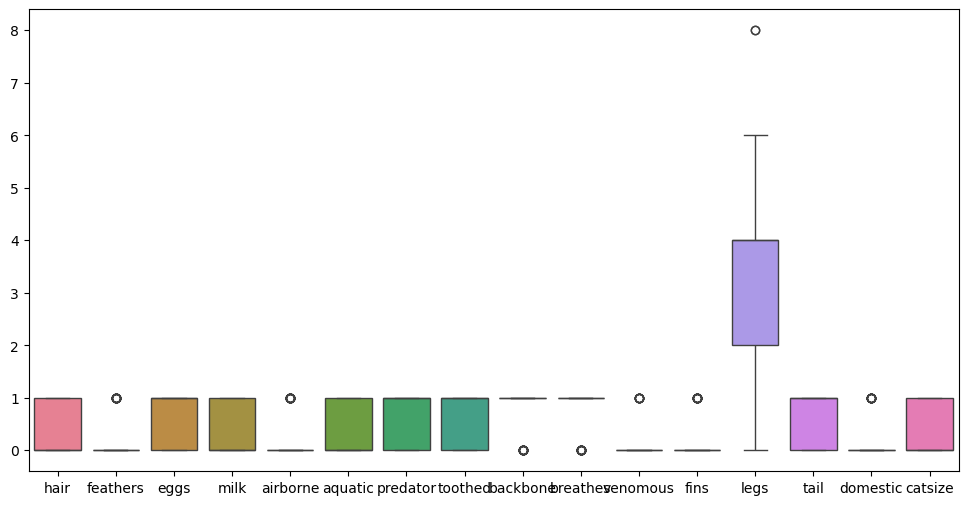

In [10]:
# Compare the spread of features
plt.figure(figsize=(12,6))
sns.boxplot(data=X)
plt.show()

In [63]:
scale=StandardScaler()
scaled_X_train=scale.fit_transform(X_train)
scaled_X_test=scale.transform(X_test)
scaled_X=scale.transform(X)

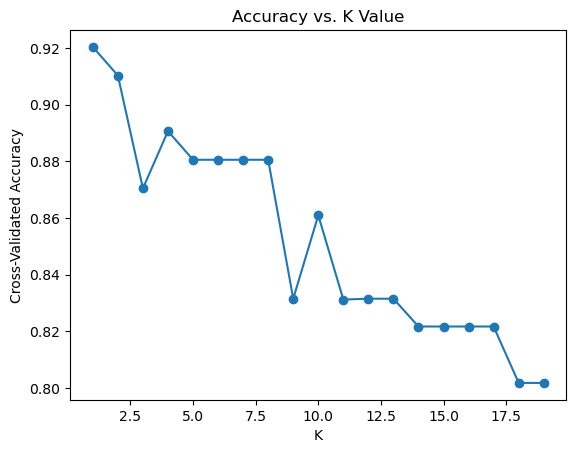

In [104]:
k_values=range(1,20)
k_scores=[]
for i in k_values:
    KNN=KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(KNN, scaled_X, Y, cv=3)
    k_scores.append(scores.mean())


plt.plot(k_values, k_scores, marker='o')
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

We are getting highest acuracy at 1 but we should not be taking it as it will lead to overfitting. our next most acuracy score is at 4. so, we will use 4

In [108]:
model=KNeighborsClassifier(n_neighbors=4)
model.fit(scaled_X_train,Y_train)

KNeighborsClassifier(n_neighbors=4)

In [112]:
y_pred=model.predict(scaled_X_test)

In [118]:
print(classification_report(Y_test,y_pred,zero_division=np.nan))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3        nan      0.00      0.00         1
           4       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.93      0.83      0.80        21
weighted avg       0.97      0.95      0.93        21



C:\Users\snjvm\anaconda3\Lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


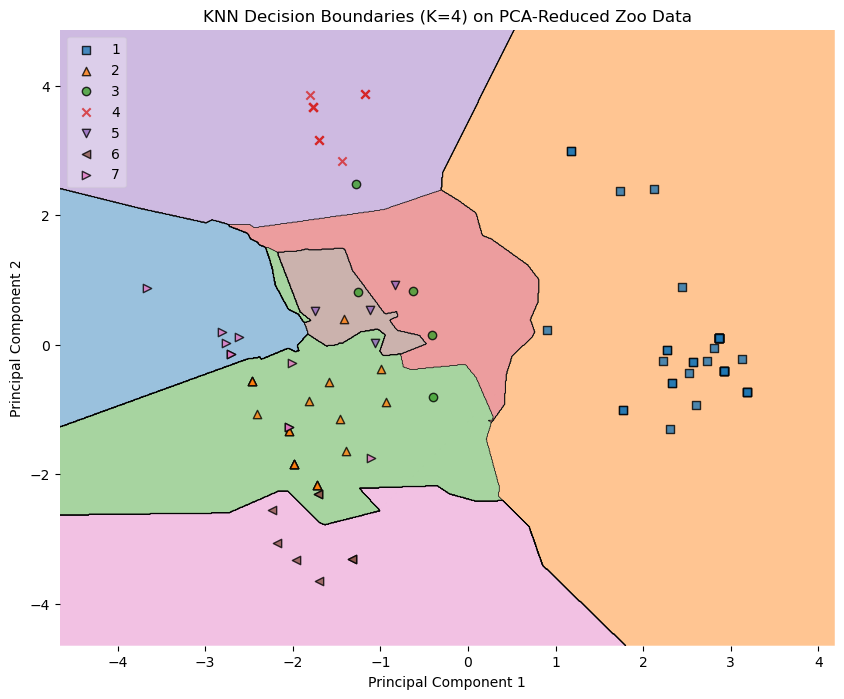

In [120]:
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

# 1. Reduce data to 2D using PCA so we can visualize it
pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled_X)

# 2. Fit KNN on the 2D PCA data
knn_pca = KNeighborsClassifier(n_neighbors=4)
knn_pca.fit(X_pca, Y)

# 3. Plotting
plt.figure(figsize=(10, 8))
plot_decision_regions(X_pca, Y.values, clf=knn_pca, legend=2)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KNN Decision Boundaries (K=4) on PCA-Reduced Zoo Data')
plt.show()

In [122]:

# Let's group our data by 'type' aggregating mean of the features 
class_dna = Zoo.groupby('type').mean(numeric_only=True)

class_dna.T.style.highlight_max(axis=1, color='lightgreen')

type,1,2,3,4,5,6,7
hair,0.951220,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000
feathers,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
eggs,0.024390,1.000000,0.800000,1.000000,1.000000,1.000000,0.900000
milk,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
airborne,0.048780,0.800000,0.000000,0.000000,0.000000,0.750000,0.000000
aquatic,0.146341,0.300000,0.200000,1.000000,1.000000,0.000000,0.600000
predator,0.536585,0.450000,0.800000,0.692308,0.750000,0.125000,0.800000
toothed,0.975610,0.000000,0.800000,1.000000,1.000000,0.000000,0.000000
backbone,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
breathes,1.000000,1.000000,0.800000,0.000000,1.000000,1.000000,0.300000


1. What are the key hyperparameters in KNN?
- The primary hyperparameters in KNN are the value of K (number of neighbors), the Distance Metric (Euclidean, Manhattan, etc.), and the Weight Function (Uniform or Distance-weighted).
2. What distance metrics can be used in KNN?
- The distance measure used to find the nearest neighbors (e.g., Euclidean, Manhattan).